<a href="https://www.kaggle.com/code/arnabmukherjee853/cifer10-cnn?scriptVersionId=195343088" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import itertools
from tensorflow.keras.layers import Input, Flatten, BatchNormalization, MaxPooling2D, GlobalMaxPooling2D, Dense, Dropout, Conv2D
from tensorflow.keras.models import Model

2024-09-04 19:29:39.798674: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-04 19:29:39.798771: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-04 19:29:39.964738: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
cifar10 = tf.keras.datasets.cifar10
(Xtrain, Ytrain), (Xtest, Ytest) = cifar10.load_data()
Xtrain, Xtest = Xtrain/255.0, Xtest/255
Ytrain, Ytest = Ytrain.flatten(), Ytest.flatten()
print("Xtrain shape: ", Xtrain.shape)
print("Xtest shape: ", Xtest.shape)
print("Ytrain shape: ", Ytrain.shape)
print("Ytest shape: ", Ytest.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Xtrain shape:  (50000, 32, 32, 3)
Xtest shape:  (10000, 32, 32, 3)
Ytrain shape:  (50000,)
Ytest shape:  (10000,)


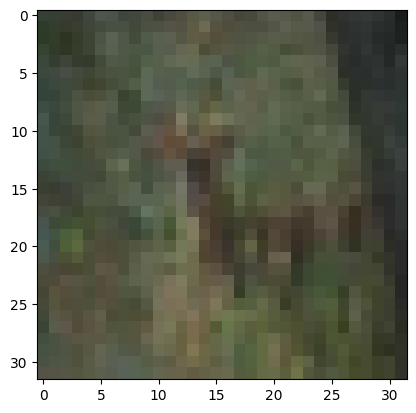

In [4]:
plt.imshow(Xtrain[10])
plt.show()

In [5]:
L = len(set(Ytrain))
print("No of Predictive classes: ", L)

No of Predictive classes:  10


In [6]:
from tensorflow.keras.callbacks import LearningRateScheduler
def Scheduler(epoch,lr):
    lr1 = lr * 0.1
    lr2 = lr1 * 0.1
    if epoch < 10:
        return lr
    elif 11 <= epoch < 25:
        return lr1
    else:
        return lr2

i = Input(shape=Xtrain[0].shape)
x = Conv2D(32,(3,3),strides=(2,2), padding='same', activation='relu')(i)
x = BatchNormalization()(x)
x = Conv2D(32,(3,3), strides=(2,2), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64,(3,3),strides=(2,2),  padding='same', activation='relu')(i)
x = BatchNormalization()(x)
x = Conv2D(64,(3,3), strides=(2,2), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128,(3,3), strides=(2,2), padding='same', activation='relu')(i)
x = BatchNormalization()(x)
x = Conv2D(128,(3,3), strides=(2,2), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(L, activation='softmax')(x)

model = Model(i,x)

In [7]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
lr_scheduler = LearningRateScheduler(Scheduler)
R = model.fit(Xtrain, Ytrain, validation_data = (Xtest, Ytest),
              callbacks=lr_scheduler,
              epochs=35)

Epoch 1/35
  36/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.2044 - loss: 4.3730

I0000 00:00:1725478207.767113      71 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1725478207.789575      71 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4169 - loss: 1.8150

W0000 00:00:1725478216.837624      72 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1725478217.972976      71 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.4170 - loss: 1.8148 - val_accuracy: 0.5337 - val_loss: 1.3284 - learning_rate: 0.0010
Epoch 2/35
  35/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5833 - loss: 1.1322

W0000 00:00:1725478218.990860      70 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5931 - loss: 1.1432 - val_accuracy: 0.5822 - val_loss: 1.1856 - learning_rate: 0.0010
Epoch 3/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6583 - loss: 0.9762 - val_accuracy: 0.6407 - val_loss: 1.0221 - learning_rate: 0.0010
Epoch 4/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7019 - loss: 0.8524 - val_accuracy: 0.6396 - val_loss: 1.0781 - learning_rate: 0.0010
Epoch 5/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7414 - loss: 0.7373 - val_accuracy: 0.6682 - val_loss: 0.9631 - learning_rate: 0.0010
Epoch 6/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7716 - loss: 0.6541 - val_accuracy: 0.6776 - val_loss: 0.9565 - learning_rate: 0.0010
Epoch 7/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8064 - loss: 0.5622 - val_accuracy: 0.6897 - val_loss: 0.9588 - learning_rate: 0.0010
Epoch 8/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8288 - loss: 0.4863

In [8]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range = 0.1,
                                                                height_shift_range = 0.1,
                                                                horizontal_flip = True,
                                                                vertical_flip = True)
train_generator = data_generator.flow(Xtrain, Ytrain, batch_size)
steps_per_epoch = Xtrain.shape[0]//batch_size
R = model.fit(train_generator, validation_data = (Xtest, Ytest), steps_per_epoch = steps_per_epoch, epochs= 15)

Epoch 1/15
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 4:48 185ms/step - accuracy: 0.5000 - loss: 2.3507

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.4673 - loss: 2.5558 - val_accuracy: 0.7116 - val_loss: 1.0761
Epoch 2/15
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4375 - loss: 2.2206

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 398us/step - accuracy: 0.4375 - loss: 2.2206 - val_accuracy: 0.7113 - val_loss: 1.0763
Epoch 3/15
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.4706 - loss: 2.5538 - val_accuracy: 0.7124 - val_loss: 1.0696
Epoch 4/15
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 403us/step - accuracy: 0.4375 - loss: 2.3319 - val_accuracy: 0.7121 - val_loss: 1.0696
Epoch 5/15
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.4745 - loss: 2.5583 - val_accuracy: 0.7131 - val_loss: 1.0685
Epoch 6/15
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 400us/step - accuracy: 0.4688 - loss: 2.8836 - val_accuracy: 0.7128 - val_loss: 1.0692
Epoch 7/15
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.4671 - loss: 2.5569 - val_accuracy: 0.7116 - val_loss: 1.0710
Epoch 8/15
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 398us/step - accuracy: 0.5625 - loss: 1.7365 - val_accuracy: 0.7114 - val_loss: 1.0708
Epoch 9/15
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.4686 - loss: 2.54

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
P_test = model.predict(Xtest).argmax(axis = 1)
print(confusion_matrix(Ytest, P_test))
print(classification_report(Ytest, P_test))

104/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

W0000 00:00:1725478666.736635      70 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


W0000 00:00:1725478667.546655      71 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


[[761  26  45  17  11   4  19   9  50  58]
 [ 11 818   4   8   1   1   9   1  26 121]
 [ 71  14 543  53  87  64  91  44  11  22]
 [ 19  18  55 470  77 161 104  50   7  39]
 [ 29   3  50  51 662  27  65  94  12   7]
 [ 12   7  31 161  54 570  57  74   8  26]
 [  5   6  23  30  36  22 854   9   8   7]
 [ 17   8  21  20  51  40  15 795   3  30]
 [ 70  47   6  10   7   6   5   3 796  50]
 [ 25  82   8   2   3   5   4  13  18 840]]
              precision    recall  f1-score   support

           0       0.75      0.76      0.75      1000
           1       0.79      0.82      0.81      1000
           2       0.69      0.54      0.61      1000
           3       0.57      0.47      0.52      1000
           4       0.67      0.66      0.67      1000
           5       0.63      0.57      0.60      1000
           6       0.70      0.85      0.77      1000
           7       0.73      0.80      0.76      1000
           8       0.85      0.80      0.82      1000
           9       0.70     

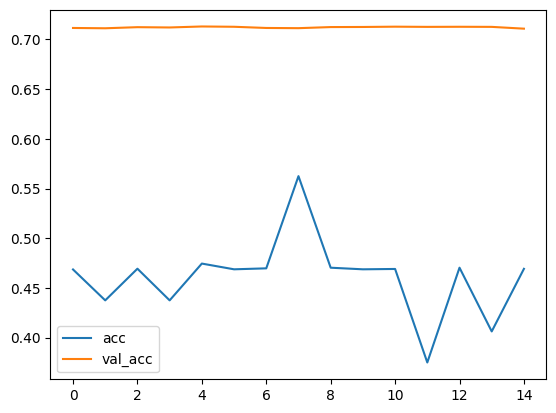

In [10]:
plt.plot(R.history['accuracy'], label='acc')
plt.plot(R.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

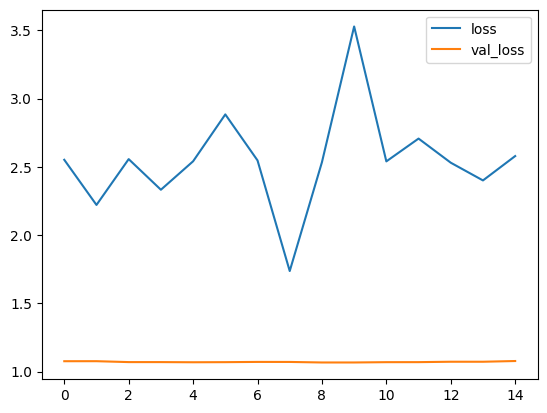

In [11]:
plt.plot(R.history['loss'], label='loss')
plt.plot(R.history['val_loss'], label='val_loss')
plt.legend()
plt.show()